In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ref = np.array([130 /3.6 ]*1000) #m/s

$a = \frac{F}{m}$

$v(t) = v(t-1) + a$

$v(t) = v(t-1) + F_e(t) \cdot \frac{1}{m}$

$F_e(t) = F_m(t) - F_d(t)$

$F_d(t) = c_d v(t)^2$

In [6]:
C_d = 0.25
M = 1300 #kg

In [7]:
v_0 = 0 #m/s

In [8]:
def process(f_m, v):
    #v(t)
    f_e = f_m - C_d*v**2
    a = f_e / M
    return v + a

In [9]:
def pid(err: np.array, kp:float, ki:float, kd:float):
    p = err[-1]
    i = np.sum(err[-min(20, len(err)):])
    d = (err[-2]-err[-1])/1.0 if len(err)>2 else 0
    return kp*p + ki*i + kd*d

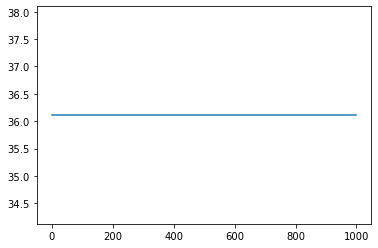

In [10]:
plt.plot(ref)

In [11]:
f_m = np.array([500]*1000)
v = [v_0]
for i in range(1000):
    v.append(process(f_m[i], v[-1]))

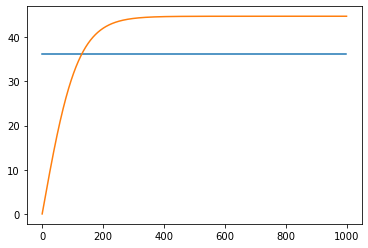

In [12]:
plt.plot(ref)
plt.plot(v)

---

In [13]:
v = [v_0]
for i in range(1000):
    err = ref[:i+1]-np.array(v)
    f_m = pid(err, 310.0, 10, 400)
    v.append(process(f_m, v[-1]))

(0.0, 50.0)

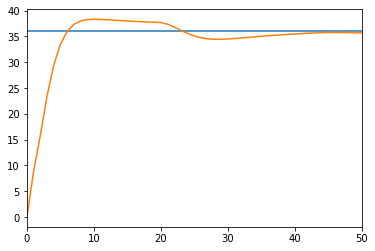

In [15]:
plt.plot(ref)
plt.plot(v)
plt.xlim(0, 50)